In [1]:
import numpy as np
import yfinance as yf

df  = yf.download('MSFT', start='2010-01-01', end='2023-01-09')

df.reset_index(drop=True, inplace=True)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
0,30.620001,31.100000,30.590000,30.950001,23.683075,38409100
1,30.850000,31.100000,30.639999,30.959999,23.690718,49749600
2,30.879999,31.080000,30.520000,30.770000,23.545336,58182400
3,30.629999,30.700001,30.190001,30.450001,23.300476,50559700
4,30.280001,30.879999,30.240000,30.660000,23.461161,51197400


In [2]:
df = df.astype('float64')

In [3]:
X = df.drop(columns=['Adj Close'])
y = df['Adj Close']

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [6]:
from sklearn.ensemble import RandomForestRegressor
reg =  RandomForestRegressor(max_depth=2, random_state=0)
reg = reg.fit(X_train, y_train)

In [7]:
y_test = y_test.sort_index()

In [8]:
X_test = X_test.sort_index()

In [9]:
y_pred = reg.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

296.8027072271992

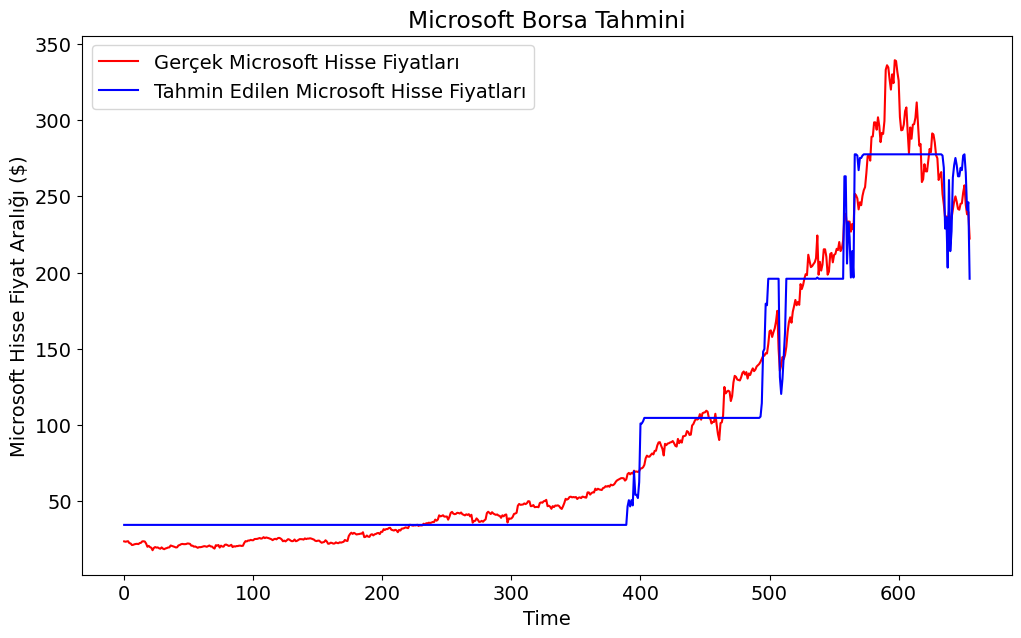

In [11]:
import matplotlib.pyplot as plt

predicted_stock_price = y_pred
actual_stock_price = y_test

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

plt.plot(np.arange(656),actual_stock_price, color="red", label="Gerçek Microsoft Hisse Fiyatları")
plt.plot(np.arange(656),predicted_stock_price, color="blue", label="Tahmin Edilen Microsoft Hisse Fiyatları")
plt.title("Microsoft Borsa Tahmini")
plt.xlabel("Time")
plt.ylabel("Microsoft Hisse Fiyat Aralığı ($)")
plt.legend();